## A CASE OF STUDYING OF BEST LOCATIONS OF A SMALL BUSINESS OPENING USING DATA SCIENCE IN THE CITY OF MADRID.

_by Jesus A Molero Cano_

### 0. Introduction

Knowing where it is the best place to open a business in a city is a hard task. For this reason, by using DataScience tools, useful Data and the proper methodology we may find the answer for a specific city, in this case the city of Madrid.

At the end of this report, the possible small businesses owners will see what Districts of Madrid are more suitable to open a new business if we consider Real State Prices (Rental), possible customers (Area population) and competence (Number of other small businesses in the area).

### 1. Data collection and sources

For this Data Science project we prepare a Data collection plan. In this case we download the information from websites of the local Public Administration

First of all, we obtain data from 'https://es.wikipedia.org/wiki/Anexo:Distritos_de_Madrid', from this webpage we obtain the different neighbourhoods of Madrid.

We obtain the second Source of information from 'https://www.idealista.com/sala-de-prensa/informes-precio-vivienda/venta/madrid-comunidad/madrid-provincia/madrid/' where we will find the different prices of real state of the different neighbourhoods and districts

Finally, we obtain the third Source of information where we will find economic statistics of the different districts of Madrid and specifically its number of locals from 'https://www.madrid.es/UnidadesDescentralizadas/UDCEstadistica/Nuevaweb/Econom%C3%ADa/Empresas%20y%20Locales/censo/D2110320.xlxs'

All of this together makes the Dataframe used for the purpose of this study

### 2. Methodology

1) Defining purpose and goal. We define the goal and scope of the problem to solve

2) Data Collection. All data is downloaded and it is presented in different Pandas Dataframes

3) Data preparation. Data is filtered and processed to create an unique Dataframe useful for the study purpose

4) Data Analysis. We create and develop the algorithm. In this case, we use a K-means algorithm to determine the most suitable neighbourhoods to open a small business. The K-means algorithm will see the similarity of the districts in three key areas: Real State Prices, Possible customers and competitors in the area. As the comparison is defined we check for the clusters and centroid that presents a lower real state price for rental, more possible customers and less competitors in the area.

5) Study results & Conclusions. The results will be shown in a map, that will represent the most suitable areas to open a small business and also a list of the best Districts to do so.

### 3. Importing libraries and tools

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim #importing geopy, before before execution I've installed geopy with Anaconda Prompt.exe

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library, before execution I've installed folium with Anaconda Prompt.exe

print('Libraries imported.')

Libraries imported.


### 2. Data collection. Dowloading data from different sources

We obtain data from 'https://es.wikipedia.org/wiki/Anexo:Distritos_de_Madrid', from this webpage we obtain the different neighbourhoods of Madrid.

#### Districts information

In [2]:
from io import StringIO #This is imporant to read an HTML webpage
import pandas as pd

# Reading HTML webpage
madrid_data=pd.read_html('https://es.wikipedia.org/wiki/Anexo:Distritos_de_Madrid', header=0, flavor='bs4')
    
madrid_data

[    Número               Nombre Superficie[n. 1]​ (Ha.)  Población  \
 0      1.0               Centro                   52282    131 928   
 1      2.0           Arganzuela                   64622    151 965   
 2      3.0               Retiro                   54662    118 516   
 3      4.0            Salamanca                   53924    143 800   
 4      5.0            Chamartín                   91755    143 424   
 5      6.0               Tetuán                   53747    153 789   
 6      7.0             Chamberí                   46792    137 401   
 7      8.0  Fuencarral-El Pardo               23 783,84    238 756   
 8      9.0      Moncloa-Aravaca                  465311    116 903   
 9     10.0               Latina                  254272    233 808   
 10    11.0          Carabanchel                  140483    243 998   
 11    12.0                Usera                   77777    134 791   
 12    13.0   Puente de Vallecas                  149686    227 595   
 13   

In [3]:
# Transforming data into dataframe
MDData=madrid_data[0]
MDData.head()

,Número,Nombre,Superficie[n. 1]​ (Ha.),Población,Densidad(Hab./Ha.),Imagen,Barrios
0,1.0,Centro,52282,131 928,25234,NaN,Palacio (11)Embajadores (12)Cortes (13)Justici...
1,2.0,Arganzuela,64622,151 965,23516,NaN,Imperial (21)Acacias (22)Chopera (23)Legazpi (...
2,3.0,Retiro,54662,118 516,21682,NaN,Pacífico (31)Adelfas (32)Estrella (33)Ibiza (3...
3,4.0,Salamanca,53924,143 800,26667,NaN,Recoletos (41)Goya (42)Fuente del Berro (43)Gu...
4,5.0,Chamartín,91755,143 424,15631,NaN,El Viso (51)Prosperidad (52)Ciudad Jardín (53)...


When reading this webpage, it is found a problem, that is why we try to read the webapage as a Broswer following the link of 'https://stackoverflow.com/questions/43590153/http-error-403-forbidden-when-reading-html'

#### Real State prices information

We obtain the second Source of information from 'https://www.idealista.com/sala-de-prensa/informes-precio-vivienda/venta/madrid-comunidad/madrid-provincia/madrid/' where we will find the different prices of real state of the different neighbourhoods and districts

In [4]:
import requests

url = 'https://www.idealista.com/sala-de-prensa/informes-precio-vivienda/venta/madrid-comunidad/madrid-provincia/madrid/'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url, headers=header)

prices = pd.read_html(r.text, header=0, flavor='bs4')

MDprices=prices[0]
MDprices.head()

,Localización,Precio m2 ago 2020,Variación mensual,Variación trimestral,Variación anual,Máximo histórico,Variación máximo
0,Madrid,3.681 €/m2,"-0,1 %","-2,7 %","-3,1 %",3.822 €/m2 jul 2019,"-3,7 %"
1,Arganzuela,3.912 €/m2,"0,0 %","-1,3 %","-4,0 %",4.096 €/m2 jul 2019,"-4,5 %"
2,Barajas,3.127 €/m2,"+0,1 %","-0,5 %","-0,5 %",3.663 €/m2 mar 2009,"-14,6 %"
3,Carabanchel,2.173 €/m2,"+1,0 %","+1,3 %","+0,3 %",3.173 €/m2 jun 2007,"-31,5 %"
4,Centro,4.963 €/m2,"-0,4 %","-2,2 %","-0,6 %",5.096 €/m2 ene 2020,"-2,6 %"


#### Number of locals information

We obtain the third Source of information where we will find economic statistics of the different districts of Madrid from 'https://www.madrid.es/UnidadesDescentralizadas/UDCEstadistica/Nuevaweb/Econom%C3%ADa/Empresas%20y%20Locales/censo/D2110320.xls' 

This excel document has been downloaded and after it has been modified for a better read of the pandas.

In [5]:
# Reading excel document, after some scraping with excel editor

MDlocals=pd.read_excel(r'C:\Users\cnaj4\Desktop\DATA SCIENCE\D2110320.xls',dtype = str,header=0, flavor='bs4')

MDlocals

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,Acceso a \nBanco Datos,ECONOMÍA. EMPRESAS Y LOCALES. CENSO DE LOCALES...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Índice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Datos,3. Actividades en locales Abiertos con Tipo de...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Actividad,NaN,Ciudad de Madrid,01.,02.,03.,04.,05.,06.,07.,08.,09.,10.,11.,12.,13.,14.,15.,16.,17.,18.,19.,20.,21.
4,NaN,NaN,NaN,NaN,Centro,Arganzuela,Retiro,Salamanca,Chamartín,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,Censo de Locales y Actividades a 1-1-2020,108043,11156,4920,3476,7559,5833,6409,6956,5464,3948,6132,8034,3853,6221,1965,7221,3866,4432,3504,1410,4193,1491
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,A,"Agricultura, ganadería, silvicultura y pesca",12,0,0,0,0,0,0,0,6,1,1,1,1,1,0,0,1,0,0,0,0,0
9,NaN,01,"Agricultura, ganadería, caza y servicios relac...",11,0,0,0,0,0,0,0,6,1,0,1,1,1,0,0,1,0,0,0,0,0


### 4. Filtering & Processing Data. 

In this part we prepare and filter the data for the next study.

In [6]:
# We prepare MDData & MDprices to display the different districts in order

MDData.sort_values(by=['Nombre'], ascending=True, inplace=True)
MDprices.sort_values(by=['Localización'], ascending=True, inplace=True)

In [7]:
# Then we change name of the different columns and erase those that are not useful
MDprices.drop(['Variación mensual', 'Variación trimestral','Variación anual','Máximo histórico','Variación máximo'], axis=1, inplace=True)

# We also change the names of the columns
MDprices.rename(columns={'Localización':'Districts'}, inplace=True)
MDprices.rename(columns={'Precio m2 ago 2020':'RealStatePrice'}, inplace=True)

# We reset the index order of the Dataframe after all changes
MDprices = MDprices.reset_index(drop=True)
                   
MDprices.head()

,Districts,RealStatePrice
0,Arganzuela,3.912 €/m2
1,Barajas,3.127 €/m2
2,Carabanchel,2.173 €/m2
3,Centro,4.963 €/m2
4,Chamartín,5.068 €/m2


In [8]:
# Then we change name of the different columns and erase those that are not useful
MDData.drop(['Número', 'Imagen','Superficie[n. 1]​ (Ha.)','Barrios','Superficie[n. 1]​ (Ha.)'], axis=1, inplace=True)

# We also change the names of the columns
MDData.rename(columns={'Nombre':'Districts'}, inplace=True)
MDData.rename(columns={'Población':'Population'}, inplace=True)
MDData.rename(columns={'Densidad(Hab./Ha.)':'PopulationDensity'}, inplace=True)

# We reset the index order of the Dataframe after all changes
MDData = MDData.reset_index(drop=True)
                   
MDData.head()

,Districts,Population,PopulationDensity
0,Arganzuela,151 965,23516
1,Barajas,46 876,1118
2,Carabanchel,243 998,17368
3,Centro,131 928,25234
4,Chamartín,143 424,15631


In [9]:
# We drop the first rows and columns that do not add value in order to make things more clear
MDlocals=MDlocals.drop([0,1,2,3,5], axis=0)
MDlocals=MDlocals.drop(['Unnamed: 0','Unnamed: 1','Unnamed: 2','Unnamed: 3'],axis=1)
MDlocals.head()

,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
4,Centro,Arganzuela,Retiro,Salamanca,Chamartín,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas
6,11156,4920,3476,7559,5833,6409,6956,5464,3948,6132,8034,3853,6221,1965,7221,3866,4432,3504,1410,4193,1491
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0,0,0,0,0,0,0,6,1,1,1,1,1,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,6,1,0,1,1,1,0,0,1,0,0,0,0,0


In [10]:
# Here we obtain the data of all locals of every district
MDlocals=MDlocals.iloc[0:2]

MDlocals

,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
4,Centro,Arganzuela,Retiro,Salamanca,Chamartín,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas
6,11156,4920,3476,7559,5833,6409,6956,5464,3948,6132,8034,3853,6221,1965,7221,3866,4432,3504,1410,4193,1491


In [11]:
# Now, we transpose the Dataframe
MDlocals=MDlocals.transpose()
MDlocals.rename(columns={4:'Districts'}, inplace=True)
MDlocals.rename(columns={6:'Number of Businesses'}, inplace=True)

# We change the specific name of a neighbourhood due to its alphabetic display
MDlocals['Districts'] = MDlocals['Districts'].replace([' Moncloa-Aravaca',], 'Moncloa-Aravaca')
MDlocals.sort_values(by=['Districts'], ascending=True, inplace=True)

MDlocals

,Districts,Number of Businesses
Unnamed: 5,Arganzuela,4920
Unnamed: 24,Barajas,1491
Unnamed: 14,Carabanchel,8034
Unnamed: 4,Centro,11156
Unnamed: 8,Chamartín,5833
Unnamed: 10,Chamberí,6956
Unnamed: 18,Ciudad Lineal,7221
Unnamed: 11,Fuencarral-El Pardo,5464
Unnamed: 19,Hortaleza,3866
Unnamed: 13,Latina,6132


### 5. Data preparation. Creating Dataframe for study

In these lines we are going to prepare the dataframe to work with

In [12]:
# Merging the 3 dataframes
df = pd.DataFrame() 
df = pd.merge(pd.merge(MDData,MDprices, on='Districts'), MDlocals, on='Districts')

df.head()

,Districts,Population,PopulationDensity,RealStatePrice,Number of Businesses
0,Arganzuela,151 965,23516,3.912 €/m2,4920
1,Barajas,46 876,1118,3.127 €/m2,1491
2,Carabanchel,243 998,17368,2.173 €/m2,8034
3,Centro,131 928,25234,4.963 €/m2,11156
4,Chamartín,143 424,15631,5.068 €/m2,5833


In [13]:
# We change certain Districts names due to likely issues with Geopy locations in the following study
df['Districts'] = df['Districts'].replace(['Centro'],'Sol, Madrid')
df['Districts'] = df['Districts'].replace(['Chamberí'],'Chamberí, Madrid')
df['Districts'] = df['Districts'].replace(['Latina'],'Latina, Madrid')
df['Districts'] = df['Districts'].replace(['Tetuán'],'Tetuán, Madrid')
df['Districts'] = df['Districts'].replace(['Chamartín'],'Chamartín, Madrid')
df['Districts'] = df['Districts'].replace(['Retiro'],'Retiro, Madrid')
df['Districts'] = df['Districts'].replace(['Salamanca'],'Salamanca, Madrid')
df['Districts'] = df['Districts'].replace(['Vicálvaro'],'Vicalvaro')

In [14]:
dataTypeSeries = df.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
Districts               object
Population              object
PopulationDensity        int64
RealStatePrice          object
Number of Businesses    object
dtype: object


In [15]:
# We prepare data to be used and we change the data types
df['RealStatePrice'] = df['RealStatePrice'].str.replace(' €/m2', '')
df['RealStatePrice'] = df['RealStatePrice'].str.replace('.', '')
df['RealStatePrice'] = df['RealStatePrice'].astype(float)
df['Population'] = df['Population'].apply(lambda x: float(x.split()[0].replace(' ', '')))

del df['PopulationDensity']

df.head(5)

,Districts,Population,RealStatePrice,Number of Businesses
0,Arganzuela,151.0,3912.0,4920
1,Barajas,46.0,3127.0,1491
2,Carabanchel,243.0,2173.0,8034
3,"Sol, Madrid",131.0,4963.0,11156
4,"Chamartín, Madrid",143.0,5068.0,5833


In [16]:
dataTypeSeries = df.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
Districts                object
Population              float64
RealStatePrice          float64
Number of Businesses     object
dtype: object


#### Coordinates with GEOPY
Now, we are going to obtain the latitude and longitude of the different districts thanks to geopy

In [17]:
from geopy.geocoders import Nominatim 
# It is also possible to use GoogleV3, apparently it has better results 
# However, GoogleV3 requieres registration and an API key 

# from geopy.geocoders import Nominatim.geocode
# registration project
geolocator = Nominatim(user_agent="specify_your_app_name_here: Toronto neighbourhoods project. Jesus Molero") 
# locating addresses through Boroughs of the different postal codes 
df['location'] = df['Districts'].apply(geolocator.geocode) 

# generating coordinates, leaving the empty values
df['coord'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None) 
#displaying coordinates values in three rows
df[['latitude', 'longitude','altitude']] = pd.DataFrame(df['coord'].tolist(), index=df.index) 

# Erasing the not needed columns
del df['coord']
del df['altitude']
df.head()

,Districts,Population,RealStatePrice,Number of Businesses,location,latitude,longitude
0,Arganzuela,151.0,3912.0,4920,"(Arganzuela, Madrid, Área metropolitana de Mad...",40.398068,-3.693734
1,Barajas,46.0,3127.0,1491,"(Barajas, Madrid, Área metropolitana de Madrid...",40.473318,-3.579845
2,Carabanchel,243.0,2173.0,8034,"(Carabanchel, Madrid, Área metropolitana de Ma...",40.374211,-3.744676
3,"Sol, Madrid",131.0,4963.0,11156,"(Sol, Puerta del Sol, Sol, Centro, Madrid, Áre...",40.416947,-3.703489
4,"Chamartín, Madrid",143.0,5068.0,5833,"(Chamartín, Madrid, Área metropolitana de Madr...",40.458987,-3.676129


Now we have a complete dataframe which we will use to classify the best neighbourhoods to open a business.

### 6. Analysis. Classification Algorithm with K-means

In this classification algorithm we should train it with a train set. However we lack of it. For that reason we create the model and train the model with the same data set.

Moreover, we classify the algorithm in 3 sets: Bad place (k=0), normal place (k=2), good place (k=1) to open a business comparing posible buyers, realstate prices and number of possible local businesses competitors.

In [18]:
# Importing all necessary libraries
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Training and creating K-means 
kdf = DataFrame(df,columns=['Population','RealStatePrice','Number of Businesses'])
kmeans = KMeans(n_clusters=3, random_state=0).fit(kdf)

# We store the clusters results, this will help in a map representation
df['Kmeans'] = kmeans.labels_
centroids = kmeans.cluster_centers_

print(centroids)

[[ 137.         5375.         8557.        ]
 [ 111.         2753.5        2999.625     ]
 [ 194.57142857 3134.14285714 6395.71428571]]


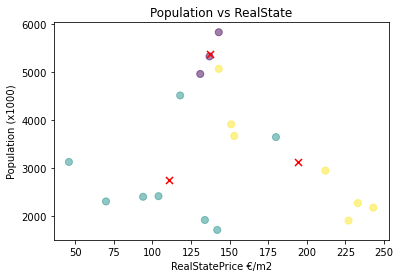

In [19]:
plt.scatter(df['Population'], df['RealStatePrice'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, marker='x')
plt.ylabel('Population (x1000)')
plt.xlabel('RealStatePrice €/m2')
plt.title('Population vs RealState')
plt.show()

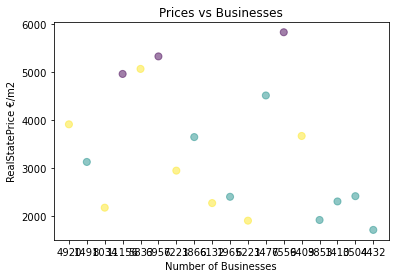

In [20]:
plt.scatter(df['Number of Businesses'], df['RealStatePrice'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.ylabel('RealStatePrice €/m2')
plt.xlabel('Number of Businesses')
plt.title('Prices vs Businesses')
plt.show()

### 7. Map showing results

In this section we will show the results of the study on a map

In [21]:
import folium

MAD = folium.Map(location=[40.4167, -3.70325])

In [22]:
# Here we will define some colors to the df and its after representation
def regioncolors(df):
    if df['Kmeans'] == 0:
        return 'red'
    elif df['Kmeans'] == 1:
        return 'green'
    else: 
        return 'yellow'
    
df['color'] = df.apply(regioncolors, axis=1)
df.head()

,Districts,Population,RealStatePrice,Number of Businesses,location,latitude,longitude,Kmeans,color
0,Arganzuela,151.0,3912.0,4920,"(Arganzuela, Madrid, Área metropolitana de Mad...",40.398068,-3.693734,2,yellow
1,Barajas,46.0,3127.0,1491,"(Barajas, Madrid, Área metropolitana de Madrid...",40.473318,-3.579845,1,green
2,Carabanchel,243.0,2173.0,8034,"(Carabanchel, Madrid, Área metropolitana de Ma...",40.374211,-3.744676,2,yellow
3,"Sol, Madrid",131.0,4963.0,11156,"(Sol, Puerta del Sol, Sol, Centro, Madrid, Áre...",40.416947,-3.703489,0,red
4,"Chamartín, Madrid",143.0,5068.0,5833,"(Chamartín, Madrid, Área metropolitana de Madr...",40.458987,-3.676129,2,yellow


In [23]:
locations = df[['latitude', 'longitude']]
locationlist = locations.values.tolist()
for i in range(0, len(df)):
    folium.CircleMarker(locationlist[i],radius=15, popup=df['Districts'][i], fill_color=df['color'][i]).add_to(MAD)
    
MAD

## DISTRICTS ON GREEN ARE THE MOST SUITABLE

In the end we can see in the map what Districts are more suitable to open a small business in terms of Real State prices, possible customers and competence in Madrid city thanks to a K-means model. 

### LIST OF MOST SUITABLE DISTRICTS TO OPEN A BUSINESS

In [25]:
results = df['Kmeans'] == 1
df[results]

,Districts,Population,RealStatePrice,Number of Businesses,location,latitude,longitude,Kmeans,color
1,Barajas,46.0,3127.0,1491,"(Barajas, Madrid, Área metropolitana de Madrid...",40.473318,-3.579845,1,green
7,Hortaleza,180.0,3646.0,3866,"(Hortaleza, Madrid, Área metropolitana de Madr...",40.472549,-3.642552,1,green
9,Moratalaz,94.0,2400.0,1965,"(Moratalaz, Madrid, Área metropolitana de Madr...",40.405933,-3.644874,1,green
11,"Retiro, Madrid",118.0,4514.0,3476,"(Retiro, Madrid, Área metropolitana de Madrid ...",40.411150,-3.676057,1,green
14,Usera,134.0,1916.0,3853,"(Usera, Madrid, Área metropolitana de Madrid y...",40.383894,-3.706446,1,green
15,Vicalvaro,70.0,2303.0,1410,"(Vicálvaro, Madrid, Área metropolitana de Madr...",40.396584,-3.576622,1,green
16,Villa de Vallecas,104.0,2413.0,3504,"(Villa de Vallecas, Madrid, Área metropolitana...",40.373958,-3.612163,1,green
17,Villaverde,142.0,1709.0,4432,"(Villaverde, Madrid, Área metropolitana de Mad...",40.345610,-3.695956,1,green
